In [1]:
import numpy as np
import matplotlib.pyplot as plt

### task1.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации

In [ ]:
def tanh(x):
  # tanh activation function: f(x) = tanh(x)
  return np.tanh(x)

def deriv_tanh(x):
  # Derivative of sigmoid: f'(x) = 1 - tanh(x) ** 2
  fx = tanh(x)
  return 1 - fx ** 2

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = tanh(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = tanh(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = tanh(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = tanh(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = tanh(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = tanh(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred) #ЧТО ЭТО???

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_tanh(sum_o1)
        d_ypred_d_w6 = h2 * deriv_tanh(sum_o1)
        d_ypred_d_b3 = deriv_tanh(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_tanh(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_tanh(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_tanh(sum_h1)
        d_h1_d_w2 = x[1] * deriv_tanh(sum_h1)
        d_h1_d_b1 = deriv_tanh(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_tanh(sum_h2)
        d_h2_d_w4 = x[1] * deriv_tanh(sum_h2)
        d_h2_d_b2 = deriv_tanh(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset вычитаем среднее значение из роста и веса
data = np.array([
  [-8, -2],  # Alice
  [19, 5],   # Bob
  [11, 3],   # Charlie
  [-21, -7], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.989 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.000 - M

### task1.5. Реализовать решение уровнения через градиентный спуск: x**2+2x-6

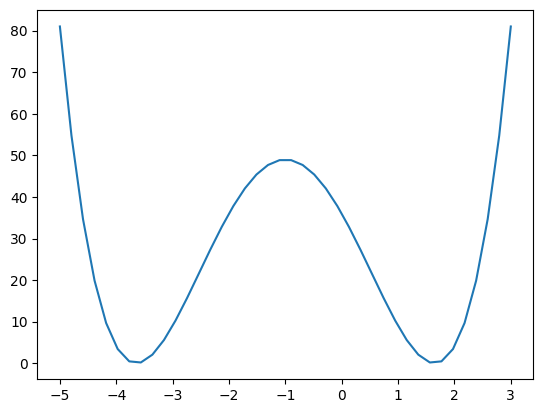

In [2]:
# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(-5, 3, 40)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 + 2 * plot_x1 - 6) ** 2
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую уравнения
plt.plot(plot_x1, plot_y1)
plt.show()

In [3]:
# Функция градиента
def dJ(x):
    return 4 * x ** 3 + 12 * x ** 2 - 16 * x - 24

 # Функция потерь
def J(x):
    return (x ** 2 + 2 * x - 6)**2

x1 = -2.0
x2 = 0.0
 # Записываем точку каждого падения градиента
history_x1=[x1]
history_x2=[x2]
i_iter=0.06
 # Скорость обучения
learn_rate = 0.01
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj1 = dJ(x1)
    dj2 = dJ(x2)
    last_x1 = x1
    last_x2 = x2
    x1 = x1 - learn_rate * dj1
    x2 = x2 - learn_rate * dj2
    history_x1.append(x1)
    history_x2.append(x2)

         # Если итерация достигнута точно, расчет завершен
    if abs(J(x1)-J(last_x1))<0.0000000001 :
        break
    if abs(J(x2)-J(last_x2))<0.0000000001 :
        break

history_y1 = J(np.array(history_x1))
history_y2 = J(np.array(history_x2))

print(f'Корни квадратного уравнения: х1 = {round(x1, 1)}, х2 = {round(x2, 1)}')

Корни квадратного уравнения: х1 = -3.6, х2 = 1.6


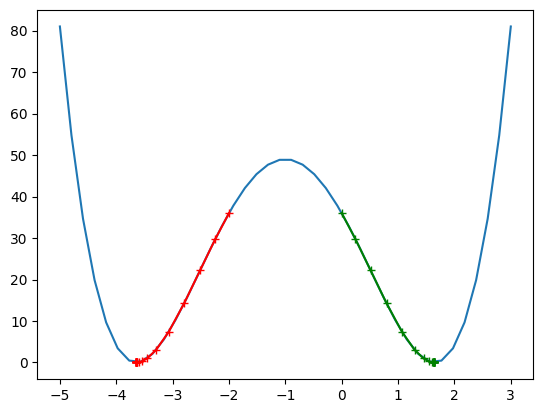

In [4]:
plt.plot(plot_x1,plot_y1)
plt.plot(history_x1,history_y1,color='r',marker='+')
plt.plot(history_x2,history_y2,color='g',marker='+')

### task1.6. (дополнительно) Реализовать решение уравнения через градиентный спуск: x**3+2x**2-6x-1

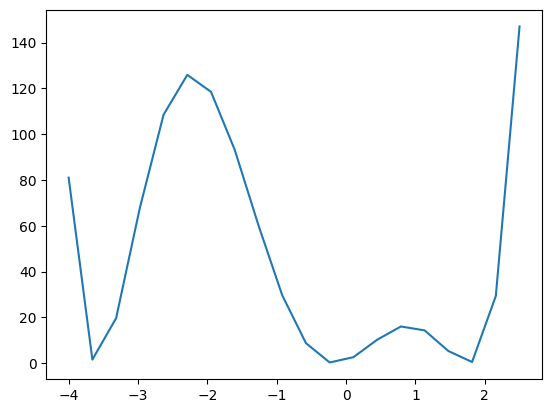

In [5]:
# y = x ** 3 + 2 * x ** 2 - 6 * x - 1
# Создаем арифметическую последовательность plot_x1
plot_x2 = np.linspace(-4, 2.5, 20)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y2 = (plot_x2 ** 3 + 2 * plot_x2 ** 2 - 6 * plot_x2 - 1) ** 2
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую кубического уравнения
plt.plot(plot_x2, plot_y2)
plt.show()

In [6]:
# Функция градиента
def dJ(x):
    return 2 * (3 * x ** 5 + 10 * x ** 4 - 16 * x ** 3 - 39 * x ** 2 + 32 * x + 6)

 # Функция потерь
def J(x):
    return (x ** 3 + 2 * x ** 2 - 6 * x - 1) ** 2

x1 = -3.0
x2 = -1.0
x3 = 2.0
 # Записываем точку каждого падения градиента
history_x1=[x1]
history_x2=[x2]
history_x3=[x3]
i_iter=0.06
 # Скорость обучения
learn_rate = 0.00001
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.06
    dj1 = dJ(x1)
    dj2 = dJ(x2)
    dj3 = dJ(x3)
    last_x1 = x1
    last_x2 = x2
    last_x3 = x3
    x1 = x1 - learn_rate * dj1
    x2 = x2 - learn_rate * dj2
    x3 = x3 - learn_rate * dj3
    history_x1.append(x1)
    history_x2.append(x2)
    history_x3.append(x3)

         # Если итерация достигнута точно, расчет завершен
    if abs(J(x1)-J(last_x1))<0.0000000001 :
        break
    if abs(J(x2)-J(last_x2))<0.0000000001 :
        break
    if abs(J(x3)-J(last_x3))<0.0000000001 :
        break

history_y1 = J(np.array(history_x1))
history_y2 = J(np.array(history_x2))
history_y3 = J(np.array(history_x3))

print(f'Корни кубического уровня: х1 = {round(x1, 2)}, х2 = {round(x2, 2)}, х3 = {round(x3, 2)}')

Корни кубического уровня: х1 = -3.59, х2 = -0.28, х3 = 1.75


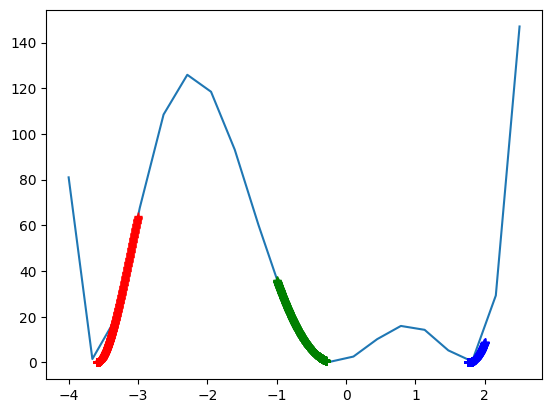

In [7]:
plt.plot(plot_x2, plot_y2)
plt.plot(history_x1,history_y1,color='r',marker='+')
plt.plot(history_x2,history_y2,color='g',marker='+')
plt.plot(history_x3,history_y3,color='b',marker='+')